In [2]:
# SR-CNN Model Performance Visualization
# Analyzing F1-Score, FPR (False Positive Rate), and FNR (False Negative Rate)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Set plotting style
sns.set_theme(style="whitegrid")
plt.rcParams.update(
    {
        "font.size": 12,
        "axes.labelsize": 13,
        "axes.titlesize": 14,
        "xtick.labelsize": 11,
        "ytick.labelsize": 11,
        "legend.fontsize": 11,
        "figure.titlesize": 16,
        "axes.titleweight": "bold",
        "figure.dpi": 120,
    }
)

In [3]:
# Load SR-CNN results
results_path = "../../results/sr-cnn.csv"
df = pd.read_csv(results_path)

print(f"Loaded SR-CNN results from: {results_path}")
print(f"Number of KPIs evaluated: {len(df)}")
print(f"\nDataFrame columns: {df.columns.tolist()}")
print(f"\nDataFrame shape: {df.shape}")
print("\nFirst few rows:")
df.head()

Loaded SR-CNN results from: ../../results/sr-cnn.csv
Number of KPIs evaluated: 26

DataFrame columns: ['file', 'f1', 'precision', 'recall', 'tp', 'fp', 'tn', 'fn', 'processing_time', 'fpr', 'fnr']

DataFrame shape: (26, 11)

First few rows:


,file,f1,precision,recall,tp,fp,tn,fn,processing_time,fpr,fnr
0,02e99bd4f6cfb33f,0.604997,0.748444,0.507692,5412,1819,119189,5248,953.273603,0.015032,0.492308
1,046ec29ddf80d62e,0.062362,0.032185,1.000000,85,2556,6014,0,37.657149,0.298250,0.000000
2,07927a9a18fa19ae,0.127660,0.082677,0.280000,42,466,11548,108,45.838392,0.038788,0.720000
3,09513ae3e75778a3,0.458084,0.410188,0.518644,153,220,131139,142,550.302253,0.001675,0.481356
4,18fbb1d5a5dc099d,0.423323,0.271670,0.958229,7685,20603,103044,335,551.257122,0.166628,0.041771


In [4]:
# Statistical summary of key metrics
metrics_of_interest = ["f1", "fpr", "fnr", "precision", "recall"]

print("=" * 70)
print("Statistical Summary of Key Metrics")
print("=" * 70)
print(df[metrics_of_interest].describe())

print("\n" + "=" * 70)
print("Mean Values")
print("=" * 70)
for metric in metrics_of_interest:
    print(f"{metric.upper():12s}: {df[metric].mean():.4f}")

print("\n" + "=" * 70)
print("Median Values")
print("=" * 70)
for metric in metrics_of_interest:
    print(f"{metric.upper():12s}: {df[metric].median():.4f}")

Statistical Summary of Key Metrics
              f1        fpr        fnr  precision     recall
count  26.000000  26.000000  26.000000  26.000000  26.000000
mean    0.539701   0.030458   0.372806   0.612888   0.627194
std     0.296550   0.074408   0.287780   0.349129   0.287780
min     0.062362   0.000000   0.000000   0.032185   0.055556
25%     0.261156   0.000152   0.081250   0.306299   0.433965
50%     0.586112   0.001357   0.387656   0.687117   0.612344
75%     0.731203   0.011982   0.566035   0.950464   0.918750
max     1.000000   0.298250   0.944444   1.000000   1.000000

Mean Values
F1          : 0.5397
FPR         : 0.0305
FNR         : 0.3728
PRECISION   : 0.6129
RECALL      : 0.6272

Median Values
F1          : 0.5861
FPR         : 0.0014
FNR         : 0.3877
PRECISION   : 0.6871
RECALL      : 0.6123



Figure saved to: ../../figures/models/srcnn.png


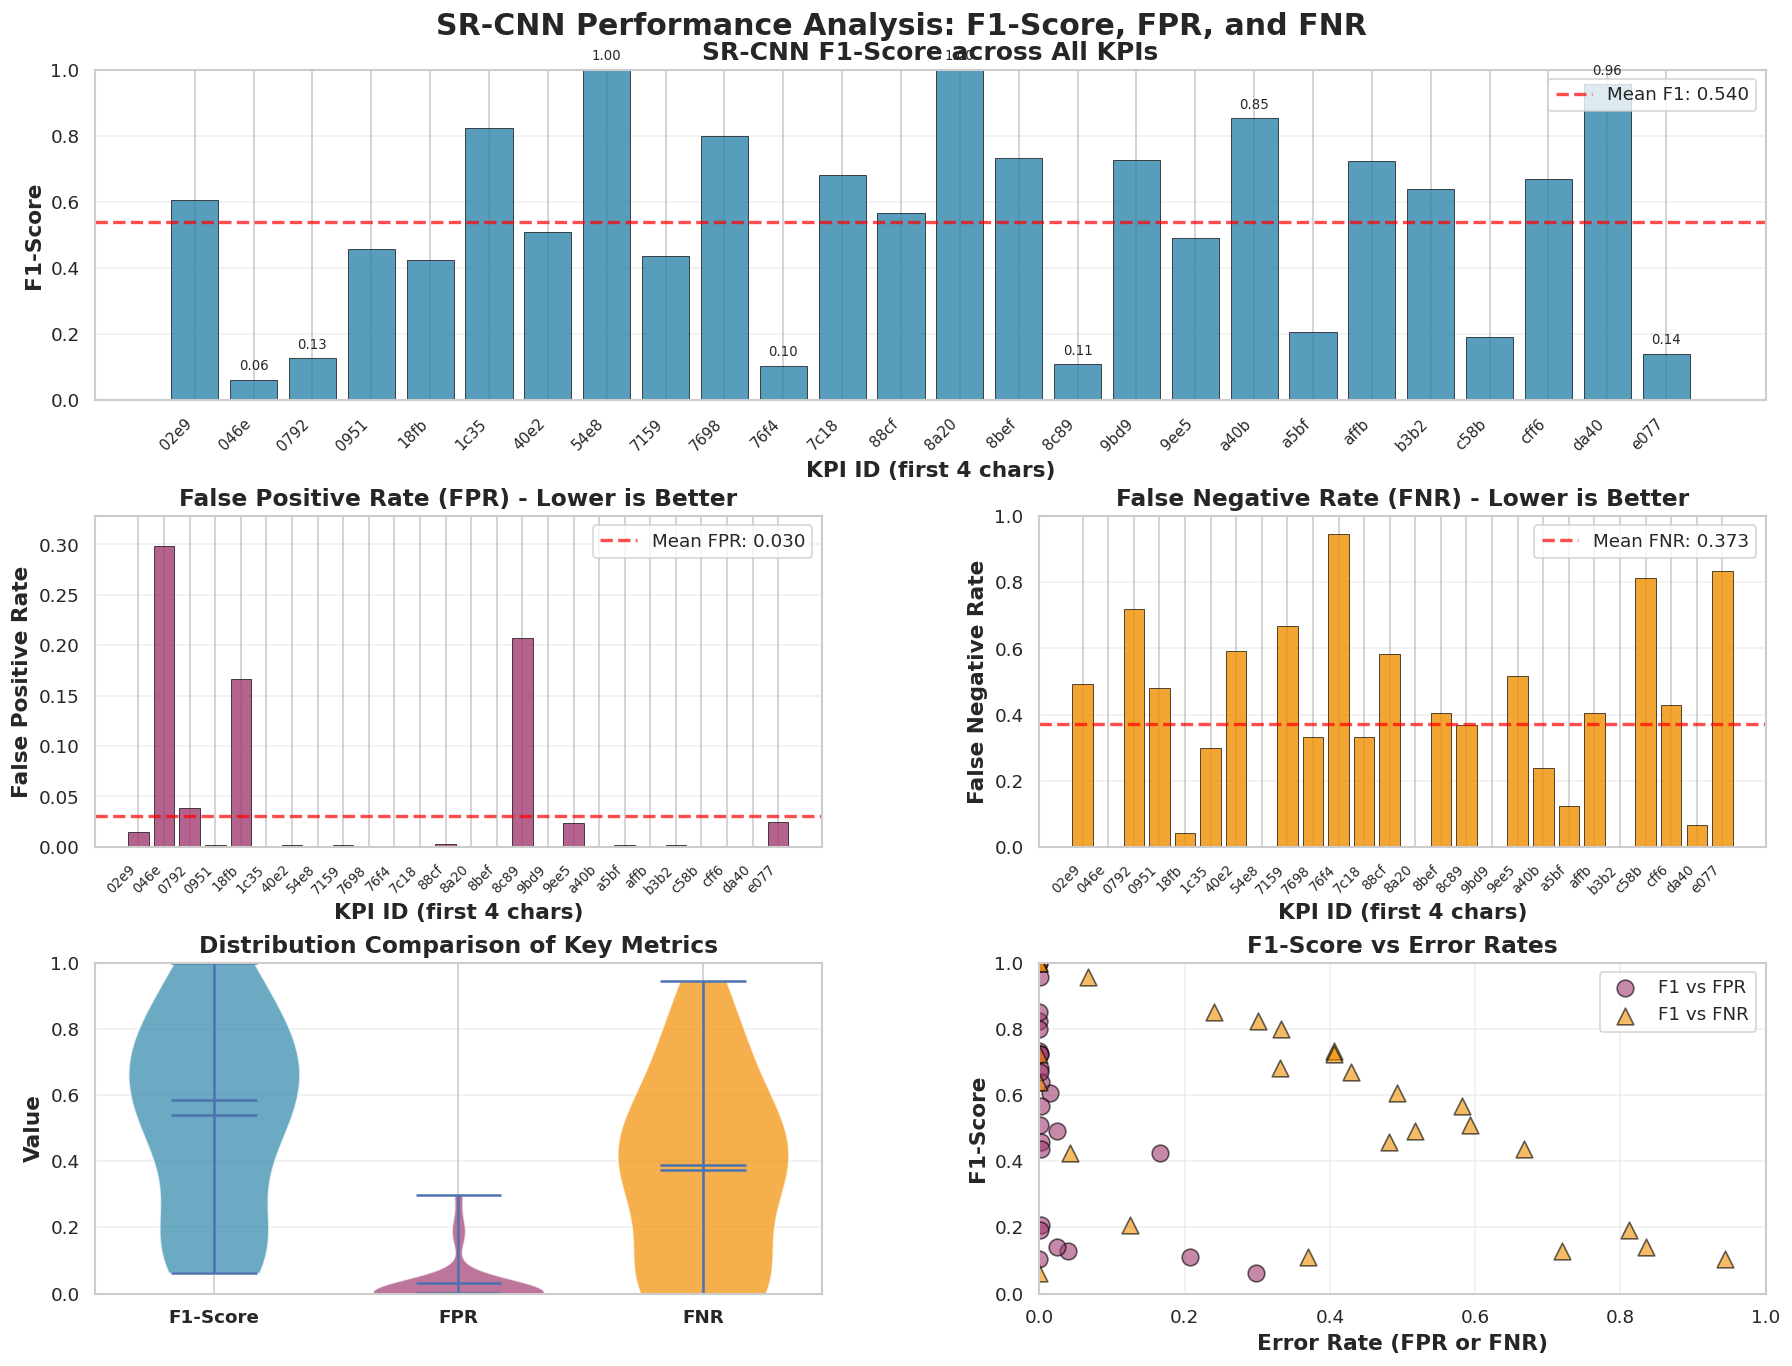

In [5]:
# Create comprehensive visualization for F1-Score, FPR, and FNR
fig = plt.figure(figsize=(16, 12))

# Create a grid layout
gs = fig.add_gridspec(
    3, 2, hspace=0.35, wspace=0.3, left=0.08, right=0.95, top=0.93, bottom=0.08
)

# Sort by KPI file name for consistent ordering
df_sorted = df.sort_values("file").reset_index(drop=True)
kpi_indices = np.arange(len(df_sorted))
# Extract first 4 characters of KPI ID for x-axis labels
kpi_labels = [kpi_id[:4] for kpi_id in df_sorted["file"]]

# Color scheme
colors = {
    "f1": "#2E86AB",  # Blue
    "fpr": "#A23B72",  # Purple/Pink
    "fnr": "#F18F01",  # Orange
    "good": "#06A77D",  # Green
    "bad": "#D62246",  # Red
}

# ============================================
# Plot 1: F1-Score Bar Chart
# ============================================
ax1 = fig.add_subplot(gs[0, :])
bars_f1 = ax1.bar(
    kpi_indices,
    df_sorted["f1"],
    color=colors["f1"],
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5,
)

# Add horizontal line for mean
mean_f1 = df_sorted["f1"].mean()
ax1.axhline(
    y=mean_f1,
    color="red",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label=f"Mean F1: {mean_f1:.3f}",
)

ax1.set_xlabel("KPI ID (first 4 chars)", fontweight="bold")
ax1.set_ylabel("F1-Score", fontweight="bold")
ax1.set_title("SR-CNN F1-Score across All KPIs", fontweight="bold", fontsize=15)
ax1.set_ylim([0, 1.0])
ax1.set_xticks(kpi_indices)
ax1.set_xticklabels(kpi_labels, rotation=45, ha="right", fontsize=9)
ax1.grid(True, alpha=0.3, axis="y")
ax1.legend(loc="upper right")

# Add value labels on top of bars for extreme values
for i, (idx, val) in enumerate(zip(kpi_indices, df_sorted["f1"])):
    if val > 0.85 or val < 0.15:
        ax1.text(idx, val + 0.02, f"{val:.2f}", ha="center", va="bottom", fontsize=8)

# ============================================
# Plot 2: FPR (False Positive Rate) Bar Chart
# ============================================
ax2 = fig.add_subplot(gs[1, 0])
bars_fpr = ax2.bar(
    kpi_indices,
    df_sorted["fpr"],
    color=colors["fpr"],
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5,
)

# Add horizontal line for mean
mean_fpr = df_sorted["fpr"].mean()
ax2.axhline(
    y=mean_fpr,
    color="red",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label=f"Mean FPR: {mean_fpr:.3f}",
)

ax2.set_xlabel("KPI ID (first 4 chars)", fontweight="bold")
ax2.set_ylabel("False Positive Rate", fontweight="bold")
ax2.set_title("False Positive Rate (FPR) - Lower is Better", fontweight="bold")
ax2.set_ylim([0, max(df_sorted["fpr"]) * 1.1])
ax2.set_xticks(kpi_indices)
ax2.set_xticklabels(kpi_labels, rotation=45, ha="right", fontsize=8)
ax2.grid(True, alpha=0.3, axis="y")
ax2.legend(loc="upper right")

# ============================================
# Plot 3: FNR (False Negative Rate) Bar Chart
# ============================================
ax3 = fig.add_subplot(gs[1, 1])
bars_fnr = ax3.bar(
    kpi_indices,
    df_sorted["fnr"],
    color=colors["fnr"],
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5,
)

# Add horizontal line for mean
mean_fnr = df_sorted["fnr"].mean()
ax3.axhline(
    y=mean_fnr,
    color="red",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label=f"Mean FNR: {mean_fnr:.3f}",
)

ax3.set_xlabel("KPI ID (first 4 chars)", fontweight="bold")
ax3.set_ylabel("False Negative Rate", fontweight="bold")
ax3.set_title("False Negative Rate (FNR) - Lower is Better", fontweight="bold")
ax3.set_ylim([0, 1.0])
ax3.set_xticks(kpi_indices)
ax3.set_xticklabels(kpi_labels, rotation=45, ha="right", fontsize=8)
ax3.grid(True, alpha=0.3, axis="y")
ax3.legend(loc="upper right")

# ============================================
# Plot 4: Distribution Comparison (Violin Plot)
# ============================================
ax4 = fig.add_subplot(gs[2, 0])

# Prepare data for violin plot
data_for_violin = pd.DataFrame(
    {"F1-Score": df_sorted["f1"], "FPR": df_sorted["fpr"], "FNR": df_sorted["fnr"]}
)

positions = [1, 2, 3]
violin_parts = ax4.violinplot(
    [df_sorted["f1"], df_sorted["fpr"], df_sorted["fnr"]],
    positions=positions,
    showmeans=True,
    showmedians=True,
    widths=0.7,
)

# Color the violins
for i, pc in enumerate(violin_parts["bodies"]):
    color = [colors["f1"], colors["fpr"], colors["fnr"]][i]
    pc.set_facecolor(color)
    pc.set_alpha(0.7)

ax4.set_xticks(positions)
ax4.set_xticklabels(["F1-Score", "FPR", "FNR"], fontweight="bold")
ax4.set_ylabel("Value", fontweight="bold")
ax4.set_title("Distribution Comparison of Key Metrics", fontweight="bold")
ax4.grid(True, alpha=0.3, axis="y")
ax4.set_ylim([0, 1.0])

# ============================================
# Plot 5: Scatter Plot - F1 vs FPR and FNR
# ============================================
ax5 = fig.add_subplot(gs[2, 1])

# Plot F1 vs FPR
scatter1 = ax5.scatter(
    df_sorted["fpr"],
    df_sorted["f1"],
    c=colors["fpr"],
    s=100,
    alpha=0.6,
    edgecolors="black",
    linewidth=1,
    marker="o",
    label="F1 vs FPR",
)

# Plot F1 vs FNR
scatter2 = ax5.scatter(
    df_sorted["fnr"],
    df_sorted["f1"],
    c=colors["fnr"],
    s=100,
    alpha=0.6,
    edgecolors="black",
    linewidth=1,
    marker="^",
    label="F1 vs FNR",
)

ax5.set_xlabel("Error Rate (FPR or FNR)", fontweight="bold")
ax5.set_ylabel("F1-Score", fontweight="bold")
ax5.set_title("F1-Score vs Error Rates", fontweight="bold")
ax5.grid(True, alpha=0.3)
ax5.legend(loc="best")
ax5.set_xlim([0, 1.0])
ax5.set_ylim([0, 1.0])

# Add main title
fig.suptitle(
    "SR-CNN Performance Analysis: F1-Score, FPR, and FNR",
    fontsize=18,
    fontweight="bold",
    y=0.97,
)

# Save the figure
output_path = "../../figures/models/srcnn.png"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
plt.savefig(output_path, dpi=300, bbox_inches="tight")
print(f"\nFigure saved to: {output_path}")

plt.show()

In [6]:
# Additional Analysis: Top and Bottom Performers

print("=" * 80)
print("TOP 5 KPIs by F1-Score")
print("=" * 80)
top5_f1 = df.nlargest(5, "f1")[["file", "f1", "fpr", "fnr", "precision", "recall"]]
print(top5_f1.to_string(index=False))

print("\n" + "=" * 80)
print("BOTTOM 5 KPIs by F1-Score")
print("=" * 80)
bottom5_f1 = df.nsmallest(5, "f1")[["file", "f1", "fpr", "fnr", "precision", "recall"]]
print(bottom5_f1.to_string(index=False))

print("\n" + "=" * 80)
print("KPIs with Lowest FPR (Best at avoiding false alarms)")
print("=" * 80)
best_fpr = df.nsmallest(5, "fpr")[["file", "f1", "fpr", "fnr", "precision", "recall"]]
print(best_fpr.to_string(index=False))

print("\n" + "=" * 80)
print("KPIs with Lowest FNR (Best at detecting anomalies)")
print("=" * 80)
best_fnr = df.nsmallest(5, "fnr")[["file", "f1", "fpr", "fnr", "precision", "recall"]]
print(best_fnr.to_string(index=False))

# Summary statistics
print("\n" + "=" * 80)
print("OVERALL PERFORMANCE SUMMARY")
print("=" * 80)
print(f"Average F1-Score:     {df['f1'].mean():.4f} ± {df['f1'].std():.4f}")
print(f"Average FPR:          {df['fpr'].mean():.4f} ± {df['fpr'].std():.4f}")
print(f"Average FNR:          {df['fnr'].mean():.4f} ± {df['fnr'].std():.4f}")
print(
    f"Average Precision:    {df['precision'].mean():.4f} ± {df['precision'].std():.4f}"
)
print(f"Average Recall:       {df['recall'].mean():.4f} ± {df['recall'].std():.4f}")
print(f"\nMedian F1-Score:      {df['f1'].median():.4f}")
print(f"Median FPR:           {df['fpr'].median():.4f}")
print(f"Median FNR:           {df['fnr'].median():.4f}")

# Count how many KPIs have good performance (F1 > 0.5)
good_performance = (df["f1"] > 0.5).sum()
print(
    f"\nKPIs with F1 > 0.5:   {good_performance}/{len(df)} ({good_performance/len(df)*100:.1f}%)"
)

# Count low error rates
low_fpr = (df["fpr"] < 0.1).sum()
low_fnr = (df["fnr"] < 0.3).sum()
print(f"KPIs with FPR < 0.1:  {low_fpr}/{len(df)} ({low_fpr/len(df)*100:.1f}%)")
print(f"KPIs with FNR < 0.3:  {low_fnr}/{len(df)} ({low_fnr/len(df)*100:.1f}%)")

TOP 5 KPIs by F1-Score
            file       f1      fpr      fnr  precision   recall
54e8a140f6237526 1.000000 0.000000 0.000000   1.000000 1.000000
8a20c229e9860d0c 1.000000 0.000000 0.000000   1.000000 1.000000
da403e4e3f87c9e0 0.955662 0.001268 0.066667   0.979086 0.933333
a40b1df87e3f1c87 0.852018 0.000086 0.240000   0.969388 0.760000
1c35dbf57f55f5e4 0.822588 0.000107 0.300416   0.998072 0.699584

BOTTOM 5 KPIs by F1-Score
            file       f1      fpr      fnr  precision   recall
046ec29ddf80d62e 0.062362 0.298250 0.000000   0.032185 1.000000
76f4550c43334374 0.104167 0.000117 0.944444   0.833333 0.055556
8c892e5525f3e491 0.109125 0.207074 0.369677   0.059733 0.630323
07927a9a18fa19ae 0.127660 0.038788 0.720000   0.082677 0.280000
e0770391decc44ce 0.140312 0.024818 0.834839   0.121963 0.165161

KPIs with Lowest FPR (Best at avoiding false alarms)
            file       f1      fpr      fnr  precision   recall
54e8a140f6237526 1.000000 0.000000 0.000000   1.000000 1.000000


Alternative figure saved to: ../../figures/models/srcnn_horizontal.png


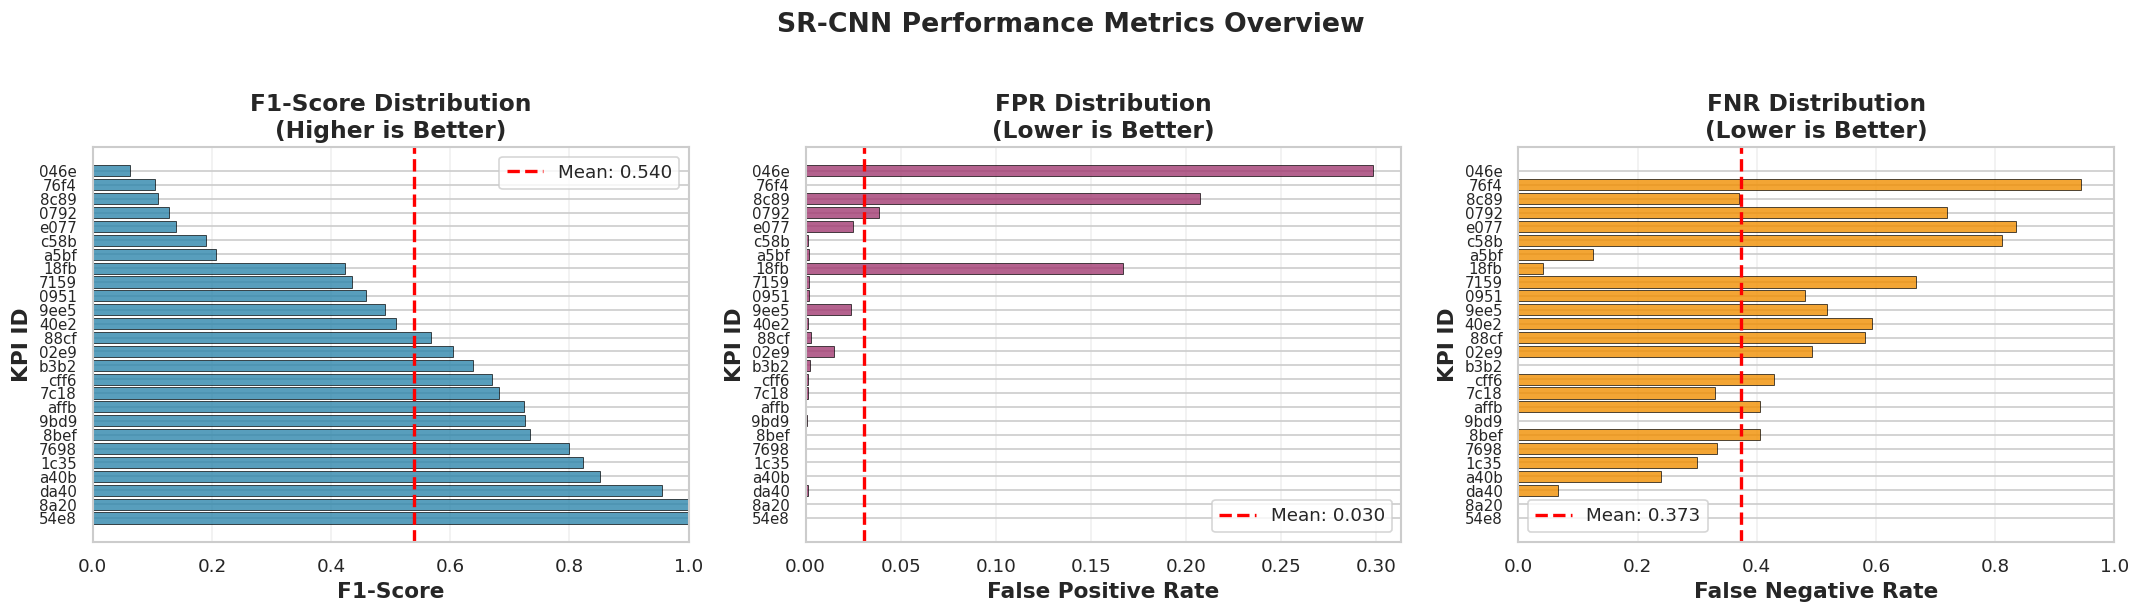

In [ ]:
# Alternative: Simple 3-panel visualization focusing on the key metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Sort by F1-score for better visualization
df_sorted_f1 = df.sort_values("f1", ascending=False).reset_index(drop=True)
x_pos = np.arange(len(df_sorted_f1))
# Extract first 4 characters of KPI ID for y-axis labels
kpi_labels_f1 = [kpi_id[:4] for kpi_id in df_sorted_f1["file"]]

# Plot 1: F1-Score
axes[0].barh(
    x_pos,
    df_sorted_f1["f1"],
    color="#2E86AB",
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5,
)
axes[0].axvline(
    x=df_sorted_f1["f1"].mean(),
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Mean: {df_sorted_f1['f1'].mean():.3f}",
)
axes[0].set_xlabel("F1-Score", fontweight="bold", fontsize=13)
axes[0].set_ylabel("KPI ID", fontweight="bold", fontsize=13)
axes[0].set_title(
    "F1-Score Distribution\n(Higher is Better)", fontweight="bold", fontsize=14
)
axes[0].set_xlim([0, 1.0])
axes[0].set_yticks(x_pos)
axes[0].set_yticklabels(kpi_labels_f1, fontsize=9)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis="x")

# Plot 2: FPR
axes[1].barh(
    x_pos,
    df_sorted_f1["fpr"],
    color="#A23B72",
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5,
)
axes[1].axvline(
    x=df_sorted_f1["fpr"].mean(),
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Mean: {df_sorted_f1['fpr'].mean():.3f}",
)
axes[1].set_xlabel("False Positive Rate", fontweight="bold", fontsize=13)
axes[1].set_ylabel("KPI ID", fontweight="bold", fontsize=13)
axes[1].set_title("FPR Distribution\n(Lower is Better)", fontweight="bold", fontsize=14)
axes[1].set_yticks(x_pos)
axes[1].set_yticklabels(kpi_labels_f1, fontsize=9)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis="x")

# Plot 3: FNR
axes[2].barh(
    x_pos,
    df_sorted_f1["fnr"],
    color="#F18F01",
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5,
)
axes[2].axvline(
    x=df_sorted_f1["fnr"].mean(),
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Mean: {df_sorted_f1['fnr'].mean():.3f}",
)
axes[2].set_xlabel("False Negative Rate", fontweight="bold", fontsize=13)
axes[2].set_ylabel("KPI ID", fontweight="bold", fontsize=13)
axes[2].set_title("FNR Distribution\n(Lower is Better)", fontweight="bold", fontsize=14)
axes[2].set_xlim([0, 1.0])
axes[2].set_yticks(x_pos)
axes[2].set_yticklabels(kpi_labels_f1, fontsize=9)
axes[2].legend()
axes[2].grid(True, alpha=0.3, axis="x")

plt.suptitle(
    "SR-CNN Performance Metrics Overview", fontsize=16, fontweight="bold", y=1.02
)
plt.tight_layout()

# Save alternative version
alt_output_path = "../../figures/models/srcnn_horizontal.png"
plt.savefig(alt_output_path, dpi=300, bbox_inches="tight")
print(f"Alternative figure saved to: {alt_output_path}")

plt.show()